<a href="https://colab.research.google.com/github/clysdid/BigContest_Advanced_2023/blob/master/1_seat_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/예술의전당/seg_seat_prefer.csv')
df2 = pd.read_csv('/content/drive/MyDrive/예술의전당/cluster_data(seat_group).csv',index_col=0)

In [ ]:
df2.head()

In [ ]:
df2.columns

# 차원 축소

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.7,n_components=2,target_metric='cuda',n_jobs=-1)

In [ ]:
embedding = umap_model.fit_transform(df2.values)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


가격 정보가 반영되지 않도록 군집화 진행

In [ ]:
np.save('/content/drive/MyDrive/예술의전당/umap_result.npy',embedding)

# 군집화

In [ ]:
n = np.load('/content/drive/MyDrive/예술의전당/umap_result.npy')

In [ ]:
k_means = KMeans(n_clusters=5)

In [ ]:
c = k_means.fit_predict(n)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_df = pd.DataFrame(n)

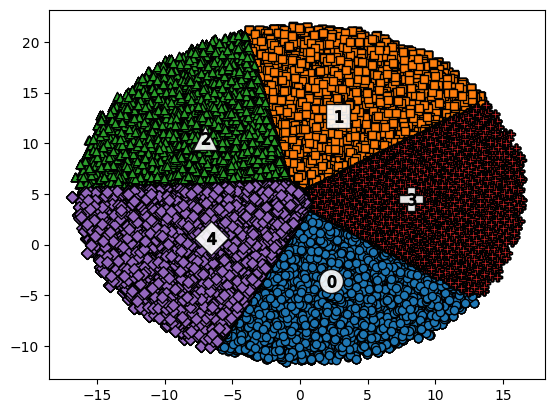

In [ ]:
cluster_df["kmeans_label"] = c

# 개별 클러스터의 중심 위치 좌표
centers = k_means.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(c)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:

    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['kmeans_label'] == cluster]
    plt.scatter(x=cluster_v[0], y=cluster_v[1], edgecolor='k', marker=markers[cluster] )

    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]

    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])

    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k',
                edgecolor='k', marker = f"${cluster}$")



## 결과

In [ ]:
df.dropna(subset=['genre'],inplace=True)

In [ ]:
df['cluster'] = c
df2['cluster'] = c

In [ ]:
for i in range(5):
  print(f'{i}번 군집')
  display(df[df.cluster==i][['seat_group']].value_counts())
  print()

In [ ]:
for i in range(5):
  print(f'{i}번 군집')
  display(df[df.cluster==i][['segment']].value_counts())
  print()

In [ ]:
for i in range(5):
  print(f'{i}번 군집')
  display(df[df.cluster==i][['pay']].mean())
  print()

In [ ]:
df2.to_csv('/content/drive/MyDrive/예술의전당/after_cluster_data_2.csv',index=False)

In [ ]:
df.to_csv('/content/drive/MyDrive/예술의전당/after_cluster_data_for_statistic_2.csv',index=False)